In [5]:
#Import delle librerie necessarie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Raccolta e ispezione preliminare dei dati

In [6]:
dataset = pd.read_csv("../../data/sentiment140_raw.csv",  encoding='ISO-8859-1', low_memory=False)
dataset.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
#Bisogna capire quante sono le osservazioni (righe) e quante sono le caratteristiche di ogni osservazione (colonne)
print("Dimensioni del dataset (righe, colonne):", dataset.shape)

Dimensioni del dataset (righe, colonne): (1600000, 6)


In [8]:
# Verifica tipi di dati per le colonne del dataset
print("\nTipi di dati:\n", dataset.dtypes)


Tipi di dati:
 target     int64
id         int64
date      object
flag      object
user      object
text      object
dtype: object


In [9]:
#Si controlla se nel dataset sono presenti valori nulli o stringhe vuote
print("Valori nulli e stringhe vuote per colonna:")
print((dataset.isnull() | dataset.apply(lambda x: x.astype(str).str.strip() == "")).sum())

Valori nulli e stringhe vuote per colonna:
target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64


In [10]:
#Verifica dei duplicati
text_counts = dataset['text'].value_counts()

duplicati = text_counts[text_counts > 1]

print("Testi duplicati e il numero di ripetizioni:")
print(duplicati)

Testi duplicati e il numero di ripetizioni:
text
isPlayer Has Died! Sorry                                                                                        210
good morning                                                                                                    118
headache                                                                                                        115
Good morning                                                                                                    112
Headache                                                                                                        106
                                                                                                               ... 
@mikeyway http://twitpic.com/7j4ra - where can you buy this??? i wont drink the pop i just want the bottle!       2
@KhloeKardashian Definitely my Mom. And Angelina Jolie                                                            2
cedar point with my bif

In [13]:
# Conta il numero totale di duplicati nella colonna 'text'
numero_duplicati = dataset['text'].duplicated().sum()
print("Numero totale di duplicati nella colonna 'text':", numero_duplicati)

Numero totale di duplicati nella colonna 'text': 18534


target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

Numero di tweet per ciascuna classe:
Negativo: 800000
Positivo: 800000


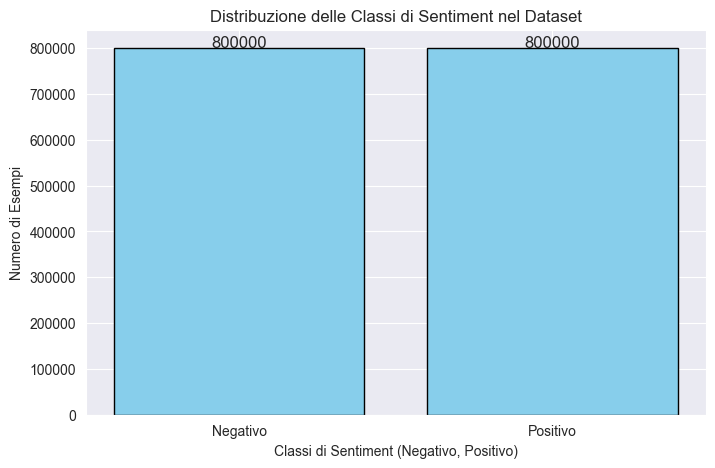

In [12]:
print((dataset.isnull() | dataset.apply(lambda x: x.astype(str).str.strip() == "")).sum())
# Controllo del bilanciamento dei dati con realizzazione dell'istogramma
sentiment_mapping = {0: "Negativo", 4: "Positivo"}
dataset['target'] = dataset['target'].map(sentiment_mapping)

# Conteggio delle classi
sentiment_counts = dataset['target'].value_counts()

# Stampa del numero di tweet per ciascuna classe
print("\nNumero di tweet per ciascuna classe:")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count}")

# Creazione del diagramma a barre
plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color='skyblue', edgecolor='black')
plt.xlabel("Classi di Sentiment (Negativo, Positivo)")
plt.ylabel("Numero di Esempi")
plt.title("Distribuzione delle Classi di Sentiment nel Dataset")

# Aggiunta dei valori sopra le barre
for i, value in enumerate(sentiment_counts.values):
    plt.text(i, value + 500, str(value), ha='center', fontsize=12)

plt.show()

# Riduzione del dataset

In [30]:
dataset = pd.read_csv("../../data/sentiment140_raw.csv", encoding='ISO-8859-1', low_memory=False)
# Frazione per ottenere 100k tweet: 100000 / 1600000 = 0.0625
sample_fraction = 0.0625

# Si fa campionamento stratificato per mantenere la distribuzione bilanciata del dataset originale
dataset_reduced = dataset.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=sample_fraction))


# Verifica
print("\nDimensioni dataset ridotto:", dataset_reduced.shape)  # Output atteso: (100000, 6)


Dimensioni dataset ridotto: (100000, 6)


C:\Users\pomic\AppData\Local\Temp\ipykernel_4460\4042266336.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataset_reduced = dataset.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=sample_fraction))


In [31]:
# Salva il subset ridotto in un nuovo CSV
dataset_reduced.to_csv('../../data/sentiment140_reduced.csv', index=False)

In [15]:
dataset_reduced.head()

,target,id,date,flag,user,text
119386,0,1828032553,Sun May 17 11:57:11 PDT 2009,NO_QUERY,xjerx,Wishing I'd said 'sod it' and was hanging with...
458992,0,2072065062,Sun Jun 07 20:20:27 PDT 2009,NO_QUERY,kevingmiller,@WildSoul - That is ridiculous and sad.
450832,0,2069600868,Sun Jun 07 16:10:35 PDT 2009,NO_QUERY,MzBreezii,gonna go put my nina to sleep. She's sick rt now
140723,0,1881099262,Fri May 22 03:35:52 PDT 2009,NO_QUERY,harrison121,Has just woken up to electric dreams blasting ...
161871,0,1957416857,Fri May 29 00:26:11 PDT 2009,NO_QUERY,Linsteyn,I only hve 9followers


In [16]:
#Si controlla se nel dataset sono presenti valori nulli o stringhe vuote
print("Valori nulli e stringhe vuote per colonna:")
print((dataset_reduced.isnull() | dataset_reduced.apply(lambda x: x.astype(str).str.strip() == "")).sum())

Valori nulli e stringhe vuote per colonna:
target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64



Numero di tweet per ciascuna classe:
Negativo: 50000
Positivo: 50000


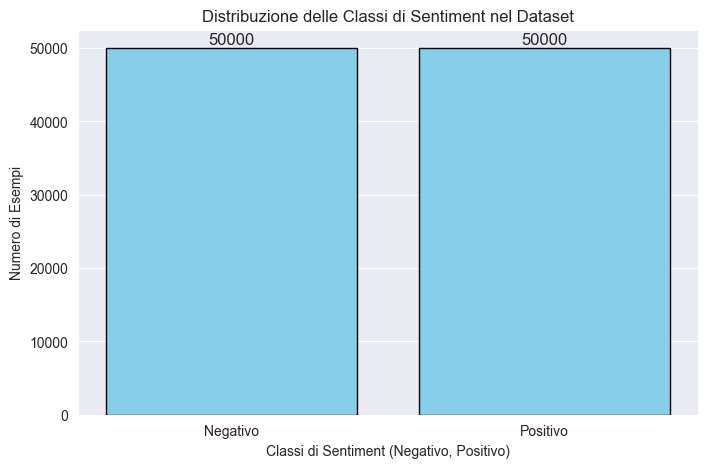

In [18]:
# Controllo del bilanciamento dei dati con realizzazione dell'istogramma
sentiment_mapping = {0: "Negativo", 4: "Positivo"}
dataset_reduced['target'] = dataset_reduced['target'].map(sentiment_mapping)

# Conteggio delle classi
sentiment_counts = dataset_reduced['target'].value_counts()

# Stampa del numero di tweet per ciascuna classe
print("\nNumero di tweet per ciascuna classe:")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count}")

# Creazione del diagramma a barre
plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color='skyblue', edgecolor='black')
plt.xlabel("Classi di Sentiment (Negativo, Positivo)")
plt.ylabel("Numero di Esempi")
plt.title("Distribuzione delle Classi di Sentiment nel Dataset")

# Aggiunta dei valori sopra le barre
for i, value in enumerate(sentiment_counts.values):
    plt.text(i, value + 500, str(value), ha='center', fontsize=12)

plt.show()

In [19]:
#Verifica dei duplicati
text_counts = dataset_reduced['text'].value_counts()

duplicati = text_counts[text_counts > 1]

print("Testi duplicati e il numero di ripetizioni:")
print(duplicati)

Testi duplicati e il numero di ripetizioni:
text
headache                                                                                                                                                13
isPlayer Has Died! Sorry                                                                                                                                12
Goodnight                                                                                                                                               10
Good morning                                                                                                                                             9
 cant afford to see Angels and Demons, so i watched it for free: http://tr.im/lvBu                                                                       9
                                                                                                                                                        ..
@danmikhael is a hose

In [20]:
# Conta il numero totale di duplicati nella colonna 'text'
numero_duplicati = dataset_reduced['text'].duplicated().sum()
print("Numero totale di duplicati nella colonna 'text':", numero_duplicati)

Numero totale di duplicati nella colonna 'text': 274


In [22]:
dataset_reduced[dataset_reduced['text'].duplicated()]

,target,id,date,flag,user,text
40412,Negativo,1573779866,Tue Apr 21 02:49:21 PDT 2009,NO_QUERY,MsChristineDior,i have a headache
477155,Negativo,2178086758,Mon Jun 15 07:10:29 PDT 2009,NO_QUERY,rob_ma,Going to work
49261,Negativo,1678096657,Sat May 02 05:28:56 PDT 2009,NO_QUERY,amity_xo,my feet hurt
277434,Negativo,1991274872,Mon Jun 01 06:44:16 PDT 2009,NO_QUERY,wowlew,isPlayer Has Died! Sorry
271184,Negativo,1989972852,Mon Jun 01 03:27:16 PDT 2009,NO_QUERY,wowlew,isPlayer Has Died! Sorry
...,...,...,...,...,...,...
1177667,Positivo,1981455858,Sun May 31 09:11:27 PDT 2009,NO_QUERY,treyjustice,good morning
1583861,Positivo,2190488952,Tue Jun 16 02:52:39 PDT 2009,NO_QUERY,Mat_The_W,Good Morning
961665,Positivo,1827125746,Sun May 17 10:02:49 PDT 2009,NO_QUERY,MarketingCat,"As a reward, you may download a free copy of E..."
1123962,Positivo,1974592258,Sat May 30 13:26:57 PDT 2009,NO_QUERY,sophienetter,Diversity or Stavros Flately to win!


In [27]:
#Analisi della lunghezza dei tweet
lunghezze = dataset_reduced["text"].str.len()

# Calcola i valori minimo, massimo e la media
lunghezza_minima = lunghezze.min()
lunghezza_massima = lunghezze.max()
lunghezza_media   = lunghezze.mean()

print("Lunghezza minima:", lunghezza_minima)
print("Lunghezza massima:", lunghezza_massima)
print("Lunghezza media:", lunghezza_media)

Lunghezza minima: 7
Lunghezza massima: 717
Lunghezza media: 74.26514


In [28]:
#Visualizzazione tweet lunghezza massima
# Calcola l'indice del tweet con la lunghezza massima
indice_massimo = dataset_reduced["text"].str.len().idxmax()

# Estrai il tweet con la lunghezza massima
tweet_massimo = dataset_reduced.loc[indice_massimo, "text"]

print("Tweet con la lunghezza massima:")
print(tweet_massimo)

Tweet con la lunghezza massima:
@catfish_ohm Ã Â¹ÂÃ Â¸ÂÃ Â¹ÂÃ Â¸Â²Ã Â¹ÂÃ Â¸Â«Ã Â¹ÂÃ Â¸?Ã Â¸Â²Ã Â¸Â£Ã Â¹ÂÃ Â¸ÂÃ Â¸Â¹Ã Â¸ÂÃ Â¸?Ã Â¸Â¸Ã Â¹ÂÃ Â¸Â£Ã Â¸Â°(Ã Â¸ÂªÃ Â¸Â±Ã Â¸ÂªÃ Â¹Â+Ã Â¸Â¢Ã Â¸Â¹Ã Â¸Â£Ã Â¸Â´Ã Â¹?Ã Â¸?Ã Â¹ÂÃ Â¸ÂÃ Â¹ÂÃ Â¹?Ã Â¸ÂÃ Â¸ÂÃ Â¸ÂÃ Â¸Â°Ã Â¸ÂÃ Â¸Â­Ã Â¸ÂÃ Â¸ÂµÃ Â¸Â¡Ã Â¸Â´Ã Â¹ÂÃ Â¸?Ã Â¸Â°Ã Â¸Â«Ã Â¸Â§Ã Â¸Â(Ã Â¸ÂÃ Â¸ÂÃ Â¸Â²Ã Â¸ÂÃ Â¹ÂÃ Â¸ÂÃ Â¸Â´Ã Â¸ÂÃ Â¹?Ã Â¸?Ã Â¸Â¢Ã Â¸Â±Ã Â¸ÂÃ Â¹ÂÃ Â¸ÂÃ Â¸Â¢Ã Â¹ÂÃ Â¸Â«Ã Â¹ÂÃ Â¹ÂÃ Â¸Â¡Ã Â¹ÂÃ Â¹ÂÃ Â¸ÂÃ Â¹ÂÃ Â¹ÂÃ Â¸Â«Ã Â¸Â£Ã Â¸Â­.Ã Â¹?Ã Â¸ÂÃ Â¹ÂÃ Â¸ÂÃ Â¹ÂÃ Â¸Â²Ã Â¸ÂÃ Â¹ÂÃ Â¸Â«Ã Â¸Â­Ã Â¸Â°Ã Â¸Â£Ã Â¸Â²Ã Â¸Â¢Ã Â¸ÂÃ Â¸Â±Ã Â¹ÂÃ Â¸ÂÃ Â¹ÂÃ Â¸ÂÃ Â¸Â²Ã Â¹ÂÃ Â¸Â¡Ã Â¹ÂÃ Â¸Â­Ã Â¸Â°Ã Â¸?Ã Â¸Â§Ã Â¹ÂÃ Â¸Â²Ã Â¸ÂÃ Â¸Â¥Ã Â¸Â²Ã Â¹?Ã Â¸Â¡Ã Â¸Â§Ã Â¹ÂÃ Â¸Â¢Ã Â¸Â­Ã Â¸Â° = 
